In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re

# Determining training epochs

The below code is meant to help determine the right number of training epochs for each task and domain

In [2]:
domains = ["laptop","rest"]
model = ["pt"]
tasks = ["ae_bert-base-uncased_5_runs","asc_bert-base-uncased_5_runs"]
prefix = "run/"
runs = 5
file = "valid.json"
logfile = "train_log.txt"

In [3]:
data = []
for m in model:
    for t in tasks:
        for d in domains:
            for i in range(1,runs+1):
                path = prefix+m+"_"+t+"/"+d+"/"+str(i)+"/"+file
                losses = json.load(open(path, 'r'))["valid_losses"]
                log = open(prefix+m+"_"+t+"/"+d+"/"+str(i)+"/"+logfile).readlines()
                train_loss = [float(re.findall("(\d*\.\d+)",i)[0]) for i in log if i[0:14]=="training loss:"]
                for epoch in range(4):
                    data.append(
                        {
                            "model":m,
                            "task":t,
                            "domain":d,
                            "run":i,
                            "epoch":epoch+1,
                            "type": "valid",
                            "loss": losses[epoch]
                        }
                    )
                    data.append(
                        {
                            "model":m,
                            "task":t,
                            "domain":d,
                            "run":i,
                            "epoch":epoch+1,
                            "type": "train",
                            "loss": train_loss[epoch]
                        }
                    )

data = pd.DataFrame(data)
data

,model,task,domain,run,epoch,type,loss
0,pt,ae_bert-base-uncased_5_runs,laptop,1,1,valid,95.490184
1,pt,ae_bert-base-uncased_5_runs,laptop,1,1,train,89.970062
2,pt,ae_bert-base-uncased_5_runs,laptop,1,2,valid,100.262790
3,pt,ae_bert-base-uncased_5_runs,laptop,1,2,train,32.545776
4,pt,ae_bert-base-uncased_5_runs,laptop,1,3,valid,139.188351
...,...,...,...,...,...,...,...
155,pt,asc_bert-base-uncased_5_runs,rest,5,2,train,1.216151
156,pt,asc_bert-base-uncased_5_runs,rest,5,3,valid,2.955897
157,pt,asc_bert-base-uncased_5_runs,rest,5,3,train,1.191761
158,pt,asc_bert-base-uncased_5_runs,rest,5,4,valid,3.018113


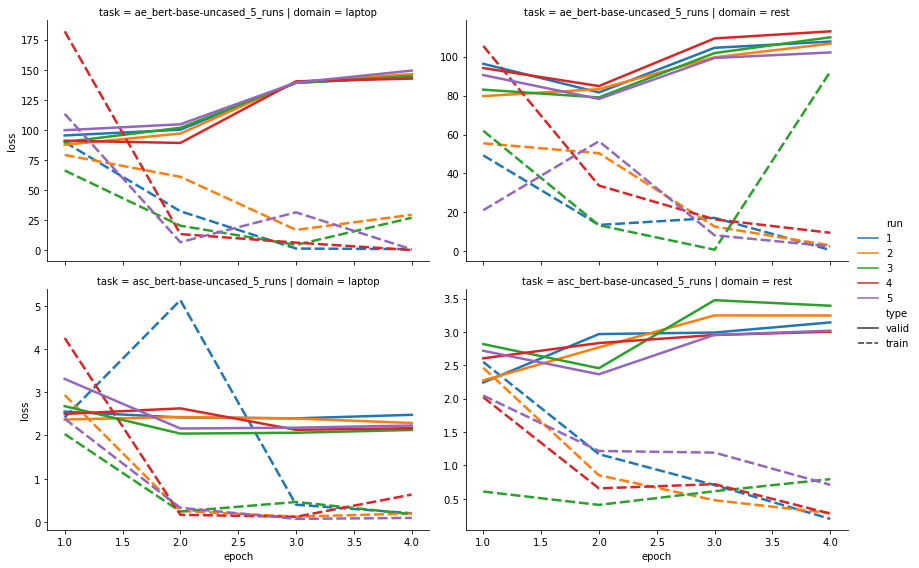

In [4]:
g = sns.FacetGrid(data, col="domain", row="task", sharey=False, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x="epoch",
         y="loss",
         hue="run",
         palette="tab10", 
         style="type",
         linewidth=2.5)
g.add_legend()
g.savefig("validation_losses.png");

In [5]:
data.groupby(by=["model","task","domain","epoch","type"])[["loss"]]\
    .mean()\
    .reset_index()\
    .pivot(index=["model","task","domain","type"], columns=["epoch"])

loss             \
epoch                                                     1          2   
model task                         domain type                           
pt    ae_bert-base-uncased_5_runs  laptop train  106.202972  26.940869   
                                          valid   92.834415  98.637753   
                                   rest   train   58.669757  33.557330   
                                          valid   88.733029  81.411847   
      asc_bert-base-uncased_5_runs laptop train    2.805974   1.223542   
                                          valid    2.681657   2.335580   
                                   rest   train    1.937812   0.860102   
                                          valid    2.530942   2.678499   

                                                                         
epoch                                                     3           4  
model task                         domain type                           
pt    ae_bert-base-uncased_5_runs  laptop train   12.276410   11.829205  
                                          valid  139.601487  145.398317  
                                   rest   train   11.124341   21.648553  
                                          valid  102.910612  107.868630  
      asc_bert-base-uncased_5_runs laptop train    0.234079    0.260273  
                                          valid    2.232896    2.258991  
                                   rest   train    0.741223    0.452705  
                                          valid    3.124933    3.160612

In [ ]:
len("training loss:")